In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from translator import SeamlessTranslator
from config import M4TLargeTranslatorConfig
args = M4TLargeTranslatorConfig
st = SeamlessTranslator(args)

2024-06-02 21:24:14.762433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 21:24:14.762585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 21:24:14.765456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 21:24:14.786892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 21:24:17.600218: W tensorflow/compiler/tf2

In [3]:
inputs = st.processor(
    text = "Concerned with the automatic discovery of regularities in data through the use of computer algorithms and with the use of these regularities to take actions such as classifying the data into different categories.",
    src_lang = st.args.lang_dict['English'],
    return_tensors="pt"
).input_ids

Keyword arguments {'add_special_tokens': False} not recognized.


In [4]:
gen_outputs = st.model.generate(
    inputs.to(st.device),
    tgt_lang=st.args.lang_dict['Chinese'],
    generate_speech=False,
    output_attentions=True
)
gen_outputs.keys()

odict_keys(['sequences', 'scores', 'encoder_attentions', 'encoder_hidden_states', 'decoder_attentions', 'cross_attentions', 'decoder_hidden_states', 'past_key_values'])

In [5]:
import torch
reshaped_cross_attentions = torch.load("example.pt")

In [6]:
encoder_text = st.processor.tokenizer.convert_ids_to_tokens(inputs[0])
decoder_text = st.processor.tokenizer.convert_ids_to_tokens(gen_outputs['sequences'][0][1:])

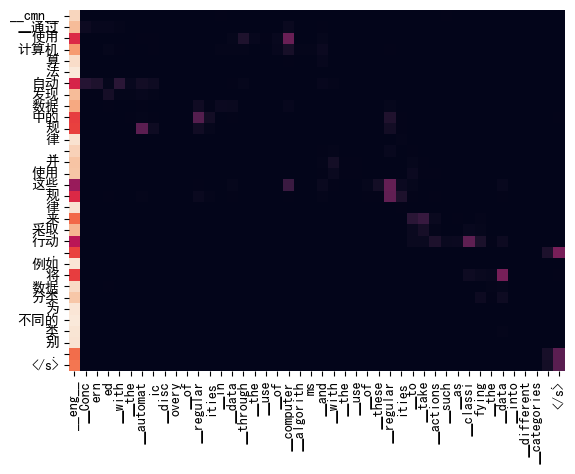

In [7]:
# https://nlp.seas.harvard.edu/2018/04/03/attention.html
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = ['SimHei']
def draw(data, x, y, ax):
    sns.heatmap(data, 
        xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
        cbar=False, ax=ax)
fig, axs = plt.subplots(1, 1)
# draw(reshaped_cross_attentions[-1][0, -1, :, :].cpu(), encoder_text, decoder_text, axs)

In [15]:
len(decoder_text[1:])

31

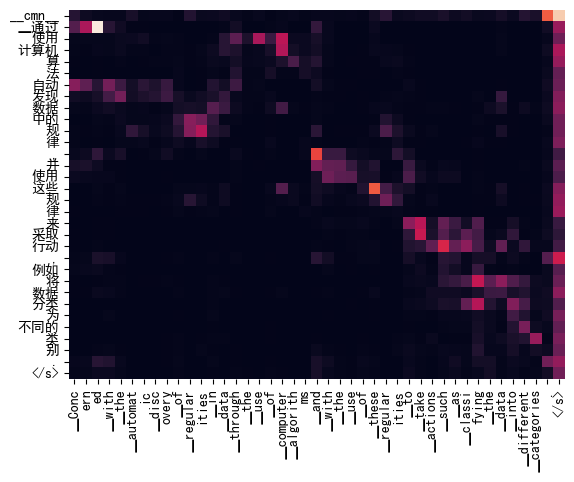

In [17]:
def draw(data, x, y, ax):
    sns.heatmap(data, 
        xticklabels=x, square=True, yticklabels=y, 
        cbar=False, ax=ax)
fig, axs = plt.subplots(1, 1)
draw(torch.mean(reshaped_cross_attentions[-1].cpu(), dim=1, keepdim=False)[0][:, 1:], encoder_text[1:], decoder_text, axs)